In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
try:
    import ai4neb
except:
    !pip install -U git+https://github.com/morisset/AI4neb.git
    import ai4neb

2024-01-24 10:49:56.843011: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
def true_fun(x):
    return np.cos(1.5 * np.pi * x)
def true_fun2(x):
    return np.sin(1.5 * np.pi * x)

# A random seed to reproduce the results
np.random.seed(0)

# The number of points used to fit the function
n_samples = 30

# Noise to be added to the points used to fit the function
noise = 0.1

# The training set: n_samples X points, with the noisy correspoing y  
X_train = np.random.rand(n_samples)
y_train = true_fun(X_train) + np.random.randn(n_samples) * noise
y_train2 = true_fun2(X_train) + np.random.randn(n_samples) * noise

# The set of points to verify the fit quality
X_test = np.linspace(0, 1, 100)
y_test = true_fun(X_test)
y_test2 = true_fun2(X_test)

In [4]:
RM = ai4neb.manage_RM(RM_type='SK_ANN', X_train=X_train, y_train=y_train, scaling=True, use_log=False,
                      X_test = X_test, y_test=y_test, verbose=True, random_seed=10)
RM.init_RM(hidden_layer_sizes=(100,100), 
           tol=1e-6, max_iter=100, 
           activation='tanh',
           solver='adam')
RM.train_RM()
RM.predict()

Instantiation. V 0.18
Training set size = 30, Test set size = 100
Train data scaled. 
Test data scaled. 
Training set size = 30, Test set size = 100
Training set size = 30, Test set size = 100
Regression Model SK_ANN
Training 1 inputs for 1 outputs with 30 data
RM trained, with 100 iterations. Score = 0.951
MLPRegressor(activation='tanh', hidden_layer_sizes=(100, 100), max_iter=100,
             random_state=10, tol=1e-06)
Training time 0.1 s.
Predicting from 1 inputs to 1 outputs using 100 data in 0.00 secs.


/home/oskar/anaconda3/envs/ai4neb_env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


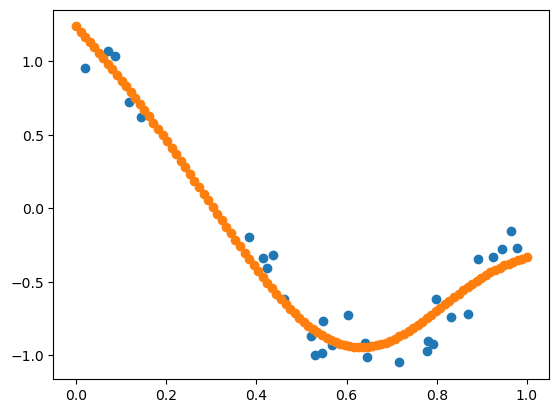

In [5]:
plt.scatter(X_train, y_train)
plt.scatter(RM.X_test_unscaled, RM.pred);

In [6]:
from ai4neb.Regressor.RegressionModel import manage_RM_data

In [7]:
RM.save_RM('RM1', save_train=True, save_test=True)
manager = manage_RM_data("RM1_data.gzip")
RM_back = ai4neb.manage_RM(RM_filename='RM1', use_data_manager=manager, verbose=True)
"""
print(RM.X_train[0:5]/ RM_back.X_train[0:5])
print(RM.y_train[0:5]/ RM_back.y_train[0:5])
print(RM.X_test[0:5]/ RM_back.X_test[0:5])
print(RM.y_test[0:5]/ RM_back.y_test[0:5])
print(RM.X_train_unscaled[0:5]/ RM_back.X_train_unscaled[0:5])
print(RM.y_train_unscaled[0:5]/ RM_back.y_train_unscaled[0:5])
print(RM.X_test_unscaled[0:5]/ RM_back.X_test_unscaled[0:5])
""";

Data saved to RM1_data.gzip
RM save to RM1.ai4neb_sk
X_str not defined by user. Searching default labels...
Default labels found for X. Using X_str = ['_X0']
y_str not defined by user. Searching default labels...
Default labels found for y. Using y_str = ['_y0']
Instantiation. V 0.18
Training set size = 0, Test set size = 0
RM loaded from RM1.ai4neb_sk
Train data scaled. 
Test data scaled. 
Training set size = 30, Test set size = 100
Train data scaled. 
Test data scaled. 
Training set size = 30, Test set size = 100
Training set size = 30, Test set size = 100


/home/oskar/anaconda3/envs/ai4neb_env/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/home/oskar/anaconda3/envs/ai4neb_env/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Predicting from 1 inputs to 1 outputs using 100 data in 0.00 secs.


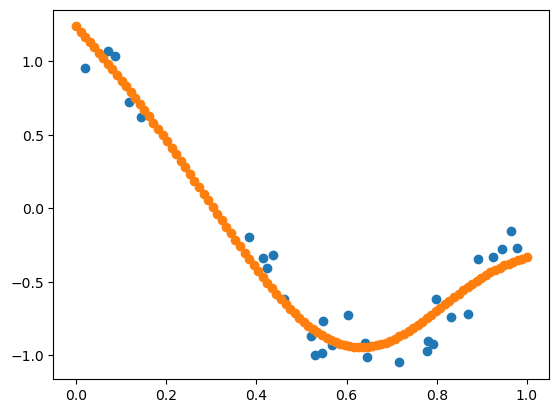

In [8]:
#RM_back.set_test(X_test)
RM_back.predict(scoring=False)
plt.scatter(X_train, y_train)
plt.scatter(RM_back.X_test_unscaled, RM_back.pred);

In [9]:
RM = ai4neb.manage_RM(RM_type='SK_ANN', X_train=X_train, y_train=np.array([y_train, y_train2]).T, scaling=True,
                      X_test = X_test, y_test=np.array([y_test, y_test2]).T, verbose=True, random_seed=10)
RM.init_RM(hidden_layer_sizes=(100,100), 
           tol=1e-6, max_iter=100, 
           activation='tanh',
           solver='adam')
RM.train_RM()
RM.predict(scoring=True)

Instantiation. V 0.18
Training set size = 30, Test set size = 100
Train data scaled. 
Test data scaled. 
Training set size = 30, Test set size = 100
Training set size = 30, Test set size = 100
Regression Model SK_ANN
Training 1 inputs for 2 outputs with 30 data
RM trained, with 100 iterations. Score = 0.943
MLPRegressor(activation='tanh', hidden_layer_sizes=(100, 100), max_iter=100,
             random_state=10, tol=1e-06)
Training time 0.1 s.
Score = nan
Predicting from 1 inputs to 2 outputs using 100 data in 0.00 secs.


/home/oskar/anaconda3/envs/ai4neb_env/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


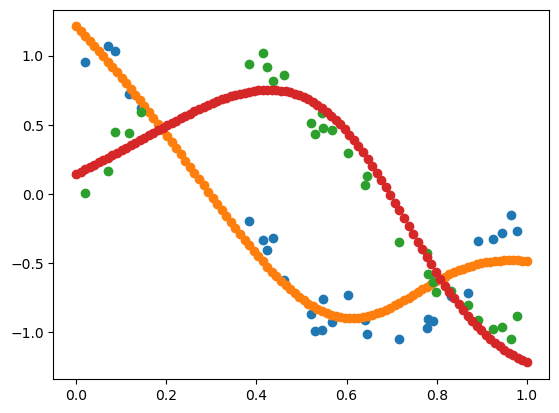

In [10]:
plt.scatter(X_train, y_train)
plt.scatter(RM.X_test_unscaled, RM.pred[:,0])
plt.scatter(X_train, y_train2)
plt.scatter(RM.X_test_unscaled, RM.pred[:,1]);

RM save to RM2.ai4neb_sk


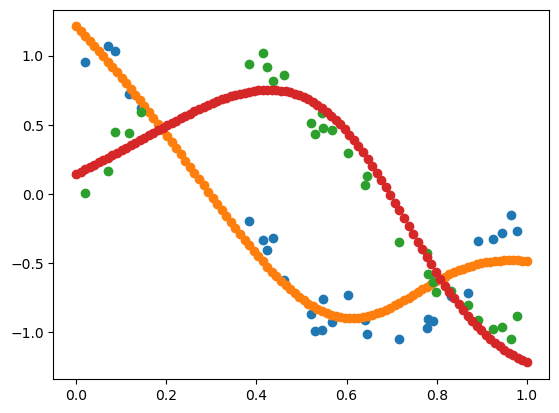

In [11]:
RM.save_RM('RM2')
RM_back2 = ai4neb.manage_RM(RM_filename='RM2')
RM_back2.set_test(X_test)
RM_back2.predict(scoring=False)
plt.scatter(X_train, y_train)
plt.scatter(RM_back2.X_test_unscaled, RM_back2.pred[:,0])
plt.scatter(X_train, y_train2)
plt.scatter(RM_back2.X_test_unscaled, RM_back2.pred[:,1]);

In [12]:
RM = ai4neb.manage_RM(RM_type='K_ANN', X_train=X_train, y_train=y_train, scaling=True,
                      X_test = X_test, y_test=y_test, verbose=True, random_seed=10)
RM.init_RM(hidden_layer_sizes=(100,100), 
           tol=1e-6, epochs=100, 
           activation='tanh',
           solver='adam')
RM.train_RM()
RM.predict(scoring=False)

Instantiation. V 0.18
Training set size = 30, Test set size = 100
Train data scaled. 
Test data scaled. 
Training set size = 30, Test set size = 100
Training set size = 30, Test set size = 100
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               200       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________
Regression Model K_ANN
Training 1 inputs for 1 outputs with 30 data


2024-01-24 10:50:16.804335: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


1/1 [==============================] - 0s 53ms/step
RM trained. Score = 0.885
Training time 3.3 s.
4/4 [==============================] - 0s 18ms/step
Predicting from 1 inputs to 1 outputs using 100 data in 0.18 secs.


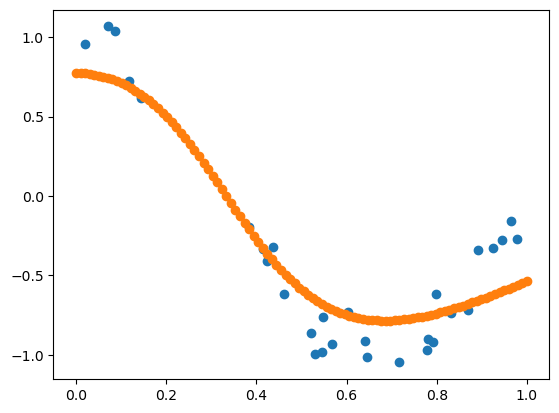

In [13]:
plt.scatter(X_train, y_train)
plt.scatter(RM.X_test_unscaled, RM.pred);

RM save to RM3.ai4neb_k0


INFO:tensorflow:Assets written to: RM3.ai4neb_k1/assets


INFO:tensorflow:Assets written to: RM3.ai4neb_k1/assets


RM save to RM3.ai4neb_k1
Instantiation. V 0.18
Training set size = 0, Test set size = 0
RM loaded from RM3.ai4neb_k0
RM loaded from RM3.ai4neb_k1
Train data scaled. 
Test data scaled. 
Training set size = 30, Test set size = 100
Training set size = 30, Test set size = 100
Test data scaled. 
Training set size = 30, Test set size = 100
4/4 [==============================] - 0s 2ms/step
Predicting from 1 inputs to 1 outputs using 100 data in 0.07 secs.


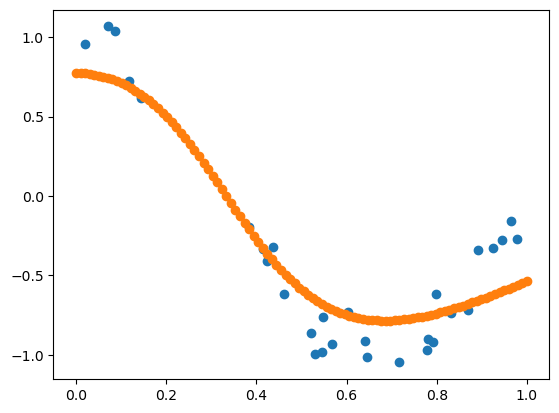

In [14]:
RM.save_RM('RM3')
RM_back3 = ai4neb.manage_RM(RM_filename='RM3', verbose=True)
RM_back3.set_test(X_test)
RM_back3.predict(scoring=False)
plt.scatter(X_train, y_train)
plt.scatter(RM_back3.X_test_unscaled, RM_back3.pred);

In [15]:
RM = ai4neb.manage_RM(RM_type='K_ANN', X_train=X_train, y_train=np.array([y_train, y_train2]).T, scaling=True,
                      X_test = X_test, y_test=np.array([y_test, y_test2]).T, verbose=True, random_seed=10)
RM.init_RM(hidden_layer_sizes=(100,100), 
           tol=1e-6, epochs=100, 
           activation='tanh',
           solver='adam')
RM.train_RM()
RM.predict(scoring=False)

Instantiation. V 0.18
Training set size = 30, Test set size = 100
Train data scaled. 
Test data scaled. 
Training set size = 30, Test set size = 100
Training set size = 30, Test set size = 100
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               200       
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 2)                 202       
                                                                 
Total params: 10,502
Trainable params: 10,502
Non-trainable params: 0
_________________________________________________________________
Regression Model K_ANN
Training 1 inputs for 2 outputs with 30 data
1/1 [==============================] - 0s 85ms/step
R

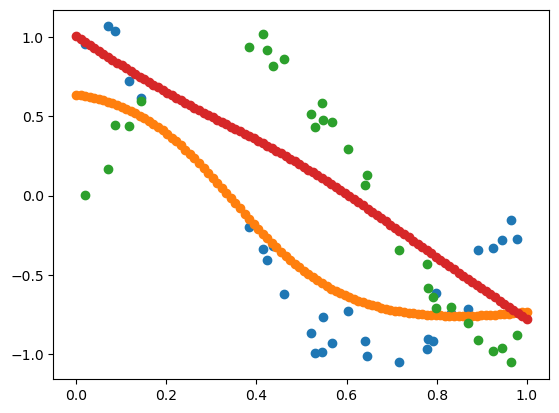

In [16]:
plt.scatter(X_train, y_train)
plt.scatter(RM.X_test_unscaled, RM.pred[:,0])
plt.scatter(X_train, y_train2)
plt.scatter(RM.X_test_unscaled, RM.pred[:,1]);

RM save to RM4.ai4neb_k0


INFO:tensorflow:Assets written to: RM4.ai4neb_k1/assets


INFO:tensorflow:Assets written to: RM4.ai4neb_k1/assets


RM save to RM4.ai4neb_k1
4/4 [==============================] - 0s 2ms/step


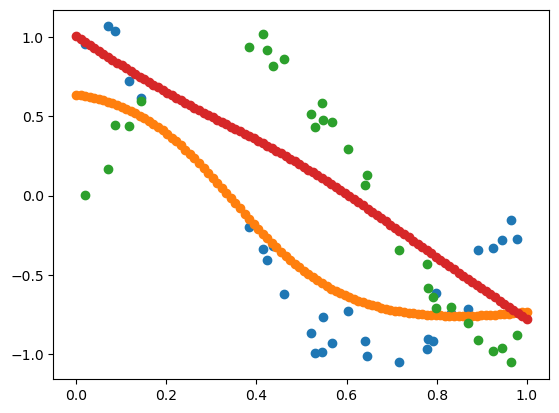

In [17]:
RM.save_RM('RM4')
RM_back4 = ai4neb.manage_RM(RM_filename='RM4')
RM_back4.set_test(X_test)
RM_back4.predict(scoring=False)
plt.scatter(X_train, y_train)
plt.scatter(RM_back4.X_test_unscaled, RM_back4.pred[:,0])
plt.scatter(X_train, y_train2)
plt.scatter(RM_back4.X_test_unscaled, RM_back4.pred[:,1]);

In [18]:
import os

[file for file in os.listdir() if file.startswith('RM')] # more pythonic than !ls -lh RM*

['RM1_data.gzip',
 'RM1.ai4neb_sk',
 'RM2.ai4neb_sk',
 'RM3.ai4neb_k0',
 'RM3.ai4neb_k1',
 'RM4.ai4neb_k0',
 'RM4.ai4neb_k1']